In [ ]:


from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


pm_all = pd.read_csv('https://raw.githubusercontent.com/priscilalourinho/data-analytics-brainstation/main/datasets/pm_acc_ir/pm_ir_acc_all.csv',  encoding="UTF-8",sep=";",
                    thousands = ",", decimal=".")

In [ ]:
pm_all

,dblock_id,dblock_pop,cs_id,cs_pop,pr_id,pr_name,pr_pop,dblock_long,dblock_lat,pm_health,pm_transit,ir_2,acs_peak,acs_offpeak,acs_walk,acs_cycling
0,10010165001,160,1001519,110525,10,NL,510550,-52.7767,47.5302,0.007227,0.021145,0.247038,0.010449,0.012085,0.012634,0.022759
1,10010165002,21,1001519,110525,10,NL,510550,-52.7793,47.5290,0.008765,0.015215,0.247038,0.012203,0.013745,0.011135,0.021007
2,10010165006,270,1001519,110525,10,NL,510550,-52.7798,47.5280,0.008706,0.014343,0.247038,0.011599,0.012697,0.011028,0.020446
3,10010165007,49,1001519,110525,10,NL,510550,-52.7720,47.5266,0.006596,0.013699,0.247038,0.011621,0.014147,0.013136,0.021258
4,10010166001,80,1001519,110525,10,NL,510550,-52.7727,47.5269,0.006355,0.018842,0.247038,0.012616,0.014880,0.013174,0.022175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61507,59550242011,0,5955042,5947,59,BC,5000879,-120.8985,56.2549,0.000219,0.000000,0.391277,0.000000,0.000000,0.000386,0.003926
61508,59570210006,0,5957022,424,59,BC,5000879,-133.6508,59.5079,0.000000,0.000000,0.558922,0.000000,0.000000,0.000000,0.000000
61509,59570210011,0,5957022,424,59,BC,5000879,-133.6338,59.5078,0.000000,0.000000,0.558922,0.000000,0.000000,0.000000,0.000000
61510,59590039007,0,5959007,3947,59,BC,5000879,-122.7918,58.8195,0.000000,0.000000,0.548055,0.000000,0.000000,0.000000,0.000447


In [ ]:
pm_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61512 entries, 0 to 61511
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dblock_id    61512 non-null  int64  
 1   dblock_pop   61512 non-null  int64  
 2   cs_id        61512 non-null  int64  
 3   cs_pop       61512 non-null  int64  
 4   pr_id        61512 non-null  int64  
 5   pr_name      61512 non-null  object 
 6   pr_pop       61512 non-null  int64  
 7   dblock_long  61512 non-null  float64
 8   dblock_lat   61512 non-null  float64
 9   pm_health    61512 non-null  float64
 10  pm_transit   61512 non-null  float64
 11  ir_2         61512 non-null  float64
 12  acs_peak     61512 non-null  float64
 13  acs_offpeak  61512 non-null  float64
 14  acs_walk     61512 non-null  float64
 15  acs_cycling  61512 non-null  float64
dtypes: float64(9), int64(6), object(1)
memory usage: 7.5+ MB


In [ ]:
pm_bc = pm_all[pm_all['dblock_pop'] != 0]
pm_bc

,dblock_id,dblock_pop,cs_id,cs_pop,pr_id,pr_name,pr_pop,dblock_long,dblock_lat,pm_health,pm_transit,ir_2,acs_peak,acs_offpeak,acs_walk,acs_cycling
0,10010165001,160,1001519,110525,10,NL,510550,-52.7767,47.5302,0.007227,0.021145,0.247038,0.010449,0.012085,0.012634,0.022759
1,10010165002,21,1001519,110525,10,NL,510550,-52.7793,47.5290,0.008765,0.015215,0.247038,0.012203,0.013745,0.011135,0.021007
2,10010165006,270,1001519,110525,10,NL,510550,-52.7798,47.5280,0.008706,0.014343,0.247038,0.011599,0.012697,0.011028,0.020446
3,10010165007,49,1001519,110525,10,NL,510550,-52.7720,47.5266,0.006596,0.013699,0.247038,0.011621,0.014147,0.013136,0.021258
4,10010166001,80,1001519,110525,10,NL,510550,-52.7727,47.5269,0.006355,0.018842,0.247038,0.012616,0.014880,0.013174,0.022175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61502,59550186003,48,5955034,21465,59,BC,5000879,-120.8458,56.2431,0.010456,0.014421,0.390608,0.005990,0.006292,0.013952,0.006828
61503,59550215013,16,5955040,5379,59,BC,5000879,-120.8473,56.4137,0.000000,0.000000,0.501359,0.000000,0.000000,0.000000,0.000000
61504,59550224007,127,5955040,5379,59,BC,5000879,-120.9720,56.9196,0.000000,0.000000,0.501359,0.000000,0.000000,0.000000,0.000000
61505,59550229002,220,5955808,247,59,BC,5000879,-121.9595,56.5174,0.000000,0.000000,0.515125,0.000000,0.000000,0.000000,0.000000


In [ ]:
pm_bc = pm_bc[pm_bc['pr_name'] != 'NL']

In [ ]:
pm_bc

,dblock_id,dblock_pop,cs_id,cs_pop,pr_id,pr_name,pr_pop,dblock_long,dblock_lat,pm_health,pm_transit,ir_2,acs_peak,acs_offpeak,acs_walk,acs_cycling
2683,59010160027,82,5901028,8115,59,BC,5000879,-115.9738,49.6924,0.003152,0.000133,0.409831,0.000000,0.000000,0.004447,0.001619
2684,59010162010,47,5901028,8115,59,BC,5000879,-115.9887,49.6960,0.002211,0.000327,0.409831,0.000000,0.000000,0.004733,0.002570
2685,59010169009,37,5901022,20499,59,BC,5000879,-115.7810,49.4921,0.004514,0.002657,0.385609,0.004216,0.004541,0.002957,0.007277
2686,59010170008,53,5901022,20499,59,BC,5000879,-115.7760,49.4936,0.007565,0.005911,0.385609,0.004831,0.005452,0.004744,0.008013
2689,59010208144,5,5901035,6536,59,BC,5000879,-115.8530,49.2607,0.000000,0.000000,0.386410,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61502,59550186003,48,5955034,21465,59,BC,5000879,-120.8458,56.2431,0.010456,0.014421,0.390608,0.005990,0.006292,0.013952,0.006828
61503,59550215013,16,5955040,5379,59,BC,5000879,-120.8473,56.4137,0.000000,0.000000,0.501359,0.000000,0.000000,0.000000,0.000000
61504,59550224007,127,5955040,5379,59,BC,5000879,-120.9720,56.9196,0.000000,0.000000,0.501359,0.000000,0.000000,0.000000,0.000000
61505,59550229002,220,5955808,247,59,BC,5000879,-121.9595,56.5174,0.000000,0.000000,0.515125,0.000000,0.000000,0.000000,0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

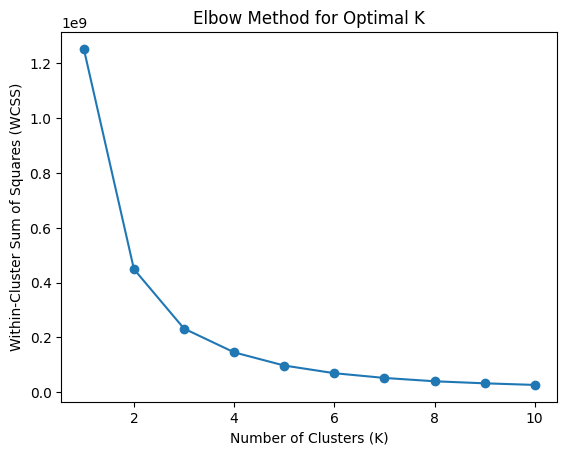

In [ ]:
X = pm_bc[['dblock_pop']]

# Trying different values of K
k_values = range(1, 11)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-47-6c7a1fa0b6d7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm_bc['cluster'] = kmeans.fit_predict(X)


         dblock_id  dblock_pop    cs_id  cs_pop  pr_id pr_name   pr_pop  \
2683   59010160027          82  5901028    8115     59      BC  5000879   
2684   59010162010          47  5901028    8115     59      BC  5000879   
2685   59010169009          37  5901022   20499     59      BC  5000879   
2686   59010170008          53  5901022   20499     59      BC  5000879   
2689   59010208144           5  5901035    6536     59      BC  5000879   
...            ...         ...      ...     ...    ...     ...      ...   
61502  59550186003          48  5955034   21465     59      BC  5000879   
61503  59550215013          16  5955040    5379     59      BC  5000879   
61504  59550224007         127  5955040    5379     59      BC  5000879   
61505  59550229002         220  5955808     247     59      BC  5000879   
61506  59550242008           5  5955042    5947     59      BC  5000879   

       dblock_long  dblock_lat  pm_health  pm_transit      ir_2  acs_peak  \
2683     -115.9738    

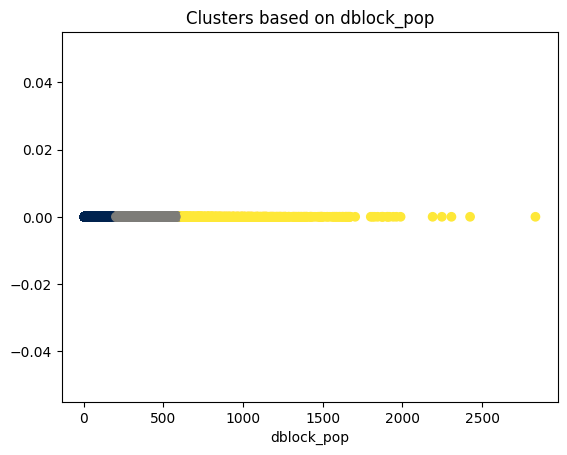

In [ ]:
# Selecting the feature for clustering
X = pm_bc[['dblock_pop']]

# Choosing the number of clusters (you may need to adjust this)
cluster_qty = 3

# Applying K-Means clustering
kmeans = KMeans(n_clusters=cluster_qty, random_state=42)
pm_bc['cluster'] = kmeans.fit_predict(X)

# Display the updated DataFrame with cluster labels
print(pm_bc)

# Plotting the clusters
plt.scatter(pm_bc['dblock_pop'], [0] * len(pm_bc), c=pm_bc['cluster'], cmap='cividis')
plt.title('Clusters based on dblock_pop')
plt.xlabel('dblock_pop')
plt.show()

In [ ]:
pm_bc

,dblock_id,dblock_pop,cs_id,cs_pop,pr_id,pr_name,pr_pop,dblock_long,dblock_lat,pm_health,pm_transit,ir_2,acs_peak,acs_offpeak,acs_walk,acs_cycling,cluster
2683,59010160027,82,5901028,8115,59,BC,5000879,-115.9738,49.6924,0.003152,0.000133,0.409831,0.000000,0.000000,0.004447,0.001619,0
2684,59010162010,47,5901028,8115,59,BC,5000879,-115.9887,49.6960,0.002211,0.000327,0.409831,0.000000,0.000000,0.004733,0.002570,0
2685,59010169009,37,5901022,20499,59,BC,5000879,-115.7810,49.4921,0.004514,0.002657,0.385609,0.004216,0.004541,0.002957,0.007277,0
2686,59010170008,53,5901022,20499,59,BC,5000879,-115.7760,49.4936,0.007565,0.005911,0.385609,0.004831,0.005452,0.004744,0.008013,0
2689,59010208144,5,5901035,6536,59,BC,5000879,-115.8530,49.2607,0.000000,0.000000,0.386410,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61502,59550186003,48,5955034,21465,59,BC,5000879,-120.8458,56.2431,0.010456,0.014421,0.390608,0.005990,0.006292,0.013952,0.006828,0
61503,59550215013,16,5955040,5379,59,BC,5000879,-120.8473,56.4137,0.000000,0.000000,0.501359,0.000000,0.000000,0.000000,0.000000,0
61504,59550224007,127,5955040,5379,59,BC,5000879,-120.9720,56.9196,0.000000,0.000000,0.501359,0.000000,0.000000,0.000000,0.000000,0
61505,59550229002,220,5955808,247,59,BC,5000879,-121.9595,56.5174,0.000000,0.000000,0.515125,0.000000,0.000000,0.000000,0.000000,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

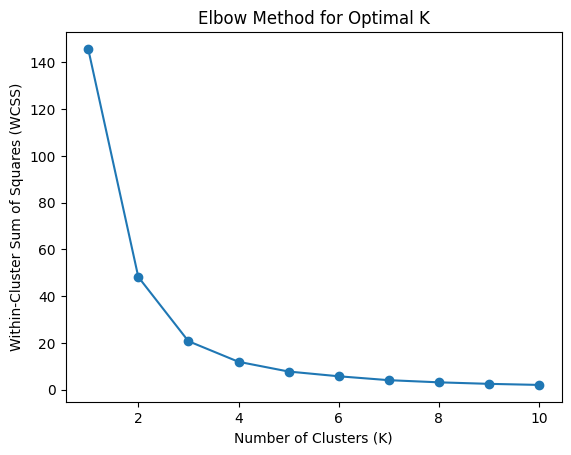

In [ ]:
Y = pm_bc[['pm_health']]

# Trying different values of K
k_values = range(1, 11)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-50-52b9de811678>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm_bc['cluster_pm'] = kmeans.fit_predict(Y)


         dblock_id  dblock_pop    cs_id  cs_pop  pr_id pr_name   pr_pop  \
2683   59010160027          82  5901028    8115     59      BC  5000879   
2684   59010162010          47  5901028    8115     59      BC  5000879   
2685   59010169009          37  5901022   20499     59      BC  5000879   
2686   59010170008          53  5901022   20499     59      BC  5000879   
2689   59010208144           5  5901035    6536     59      BC  5000879   
...            ...         ...      ...     ...    ...     ...      ...   
61502  59550186003          48  5955034   21465     59      BC  5000879   
61503  59550215013          16  5955040    5379     59      BC  5000879   
61504  59550224007         127  5955040    5379     59      BC  5000879   
61505  59550229002         220  5955808     247     59      BC  5000879   
61506  59550242008           5  5955042    5947     59      BC  5000879   

       dblock_long  dblock_lat  pm_health  pm_transit      ir_2  acs_peak  \
2683     -115.9738    

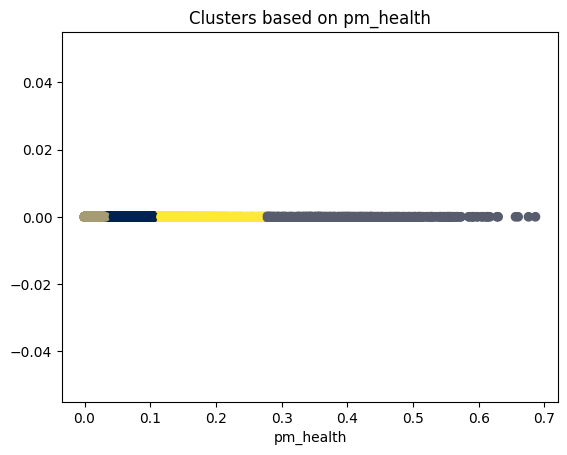

In [ ]:
# Selecting the feature for clustering
Y = pm_bc[['pm_health']]

# Choosing the number of clusters (you may need to adjust this)
cluster_qty = 4

# Applying K-Means clustering
kmeans = KMeans(n_clusters=cluster_qty, random_state=42)
pm_bc['cluster_pm'] = kmeans.fit_predict(Y)

# Display the updated DataFrame with cluster labels
print(pm_bc)

# Plotting the clusters
plt.scatter(pm_bc['pm_health'], [0] * len(pm_bc), c=pm_bc['cluster_pm'], cmap='cividis')
plt.title('Clusters based on pm_health')
plt.xlabel('pm_health')
plt.show()

In [ ]:
pm_bc

,dblock_id,dblock_pop,cs_id,cs_pop,pr_id,pr_name,pr_pop,dblock_long,dblock_lat,pm_health,pm_transit,ir_2,acs_peak,acs_offpeak,acs_walk,acs_cycling,cluster,cluster_pm
2683,59010160027,82,5901028,8115,59,BC,5000879,-115.9738,49.6924,0.003152,0.000133,0.409831,0.000000,0.000000,0.004447,0.001619,0,2
2684,59010162010,47,5901028,8115,59,BC,5000879,-115.9887,49.6960,0.002211,0.000327,0.409831,0.000000,0.000000,0.004733,0.002570,0,2
2685,59010169009,37,5901022,20499,59,BC,5000879,-115.7810,49.4921,0.004514,0.002657,0.385609,0.004216,0.004541,0.002957,0.007277,0,2
2686,59010170008,53,5901022,20499,59,BC,5000879,-115.7760,49.4936,0.007565,0.005911,0.385609,0.004831,0.005452,0.004744,0.008013,0,2
2689,59010208144,5,5901035,6536,59,BC,5000879,-115.8530,49.2607,0.000000,0.000000,0.386410,0.000000,0.000000,0.000000,0.000000,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61502,59550186003,48,5955034,21465,59,BC,5000879,-120.8458,56.2431,0.010456,0.014421,0.390608,0.005990,0.006292,0.013952,0.006828,0,2
61503,59550215013,16,5955040,5379,59,BC,5000879,-120.8473,56.4137,0.000000,0.000000,0.501359,0.000000,0.000000,0.000000,0.000000,0,2
61504,59550224007,127,5955040,5379,59,BC,5000879,-120.9720,56.9196,0.000000,0.000000,0.501359,0.000000,0.000000,0.000000,0.000000,0,2
61505,59550229002,220,5955808,247,59,BC,5000879,-121.9595,56.5174,0.000000,0.000000,0.515125,0.000000,0.000000,0.000000,0.000000,1,2


In [ ]:
pm_bc.to_csv('clusters_bc.csv', encoding='utf-8', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-54-90dcc2cc5b95>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm_bc['cluster_peak'] = kmeans.fit_predict(Z)


         dblock_id  dblock_pop    cs_id  cs_pop  pr_id pr_name   pr_pop  \
2683   59010160027          82  5901028    8115     59      BC  5000879   
2684   59010162010          47  5901028    8115     59      BC  5000879   
2685   59010169009          37  5901022   20499     59      BC  5000879   
2686   59010170008          53  5901022   20499     59      BC  5000879   
2689   59010208144           5  5901035    6536     59      BC  5000879   
...            ...         ...      ...     ...    ...     ...      ...   
61502  59550186003          48  5955034   21465     59      BC  5000879   
61503  59550215013          16  5955040    5379     59      BC  5000879   
61504  59550224007         127  5955040    5379     59      BC  5000879   
61505  59550229002         220  5955808     247     59      BC  5000879   
61506  59550242008           5  5955042    5947     59      BC  5000879   

       dblock_long  dblock_lat  pm_health  pm_transit      ir_2  acs_peak  \
2683     -115.9738    

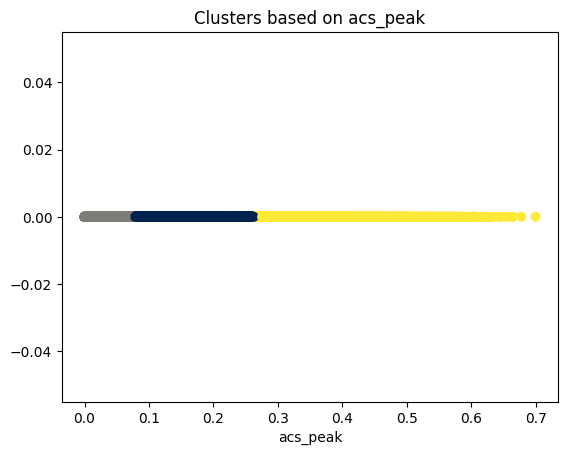

In [ ]:
# Selecting the feature for clustering
Z = pm_bc[['acs_peak']]

# Choosing the number of clusters (you may need to adjust this)
cluster_qty = 3

# Applying K-Means clustering
kmeans = KMeans(n_clusters=cluster_qty, random_state=42)
pm_bc['cluster_peak'] = kmeans.fit_predict(Z)

# Display the updated DataFrame with cluster labels
print(pm_bc)

# Plotting the clusters
plt.scatter(pm_bc['acs_peak'], [0] * len(pm_bc), c=pm_bc['cluster_peak'], cmap='cividis')
plt.title('Clusters based on acs_peak')
plt.xlabel('acs_peak')
plt.show()